In [34]:
# %% Import necessary libraries
import matplotlib.pyplot as plt

import numpy as np

import adi

from comms_lib.pluto import Pluto

In [39]:
!iio_info -s

Unable to create Local IIO context : Function not implemented (78)
Available contexts:
	0: 192.168.3.1 (Analog Devices PlutoSDR Rev.C (Z7010-AD9363A)), serial=10447318ac0f001915003200073317bbca [ip:pluto.local.]
	1: fe80::205:f7ff:fe3d:f5f5%en10 (Analog Devices PlutoSDR Rev.C (Z7010-AD9363A)), serial=10447318ac0f001915003200073317bbca [ip:pluto.local.]
	2: 0456:b673 (Analog Devices Inc. PlutoSDR (ADALM-PLUTO)), serial=10447318ac0f001915003200073317bbca [usb:1.5.5]


In [40]:
sdr = Pluto("usb:1.5.5")

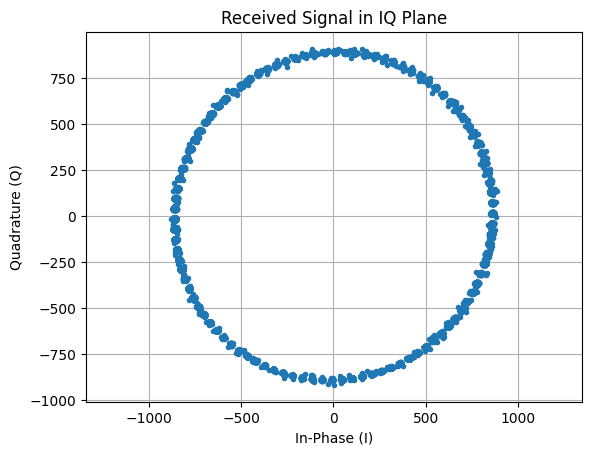

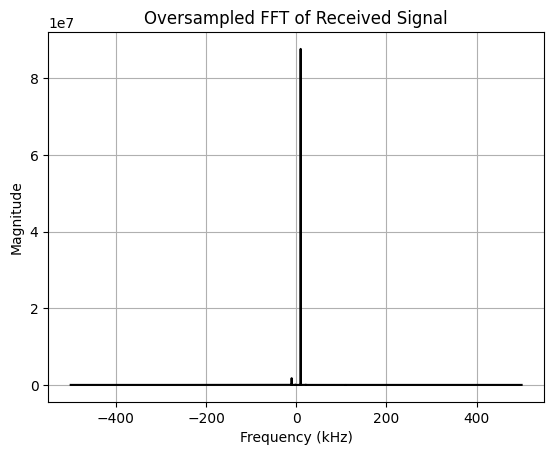

In [41]:
# %% Initialize Pluto SDR
sample_rate = 1e6  # baseband sampling rate (samples per second)
sdr.carrier_frequency = 815e6  # Set carrier frequency for transmission and reception
sdr.sample_rate = int(sample_rate)  # Set baseband sampling rate of Pluto

# %% Generate a signal to transmit
N = 10000  # number of samples to transmit
t = np.arange(N) / sample_rate  # time vector

# TODO: generate a complex signal at 10kHz. Hint: use `np.exp`
tx_signal = np.exp(2j * np.pi * 10e3 * t).astype(np.complex64)  # Change this line

# %% Transmit and receive signal
# sdr.tx_gain = 0
sdr.tx(tx_signal)

rx_signal = sdr.rx()  # Capture raw samples from Pluto

# plot the received signal
plt.figure()
plt.plot(np.real(rx_signal), np.imag(rx_signal), ".")
plt.xlabel("In-Phase (I)")
plt.ylabel("Quadrature (Q)")
plt.title("Received Signal in IQ Plane")
plt.grid(True)
plt.axis("equal")
plt.show()

# TODO: plot the fft of the received signal
rx_fft = np.fft.fftshift(np.abs(np.fft.fft(rx_signal)))  # Change this line!!

# Get the actual frequency of the FFT: from -sample_rate/2 to sample_rate/2
f = np.linspace(sample_rate / -2, sample_rate / 2, len(rx_fft))

plt.figure()
plt.plot(f / 1e3, rx_fft, color="black")
plt.xlabel("Frequency (kHz)")
plt.ylabel("Magnitude")
plt.title("Oversampled FFT of Received Signal")
plt.grid(True)
plt.show()

### Antenna Resonance Frequency

As mentioned in the lecture, the resonance frequency of an antenna is determined by its physical dimensions. In the next section, we will empirically determine the resonance frequency of a dipole antenna by checking the received signal strength at various frequencies.

- At each frequency, you can transmit the same test signal you used in the previous section.
- Measure the received signal strength at each frequency. Hint: use `np.abs()` to get the absolute value of the received signal strength.
- Plot the received signal strength against frequency to visualize the resonance frequency. What's the resonance frequency of the dipole antenna?

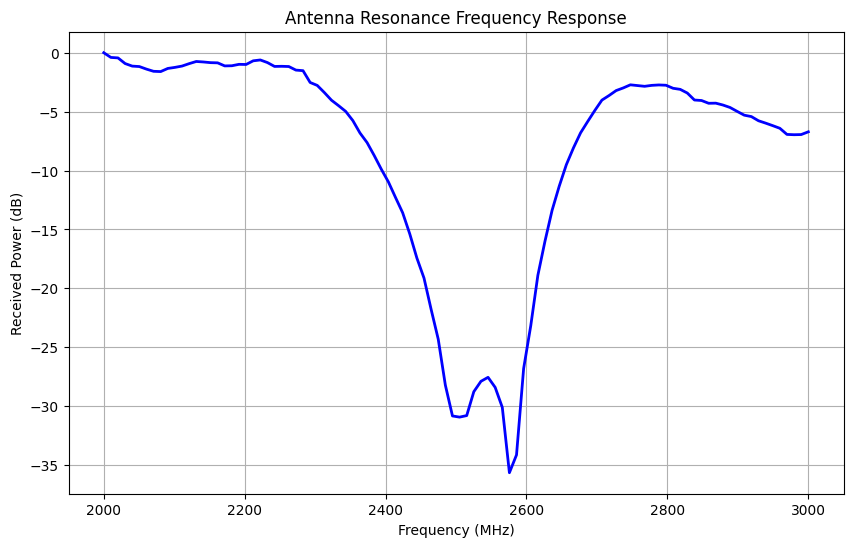

Antenna resonance frequency: 2000.0 MHz
Maximum received power: 0.0 dB


In [42]:
# %% Find the antenna resonance frequency by transmitting the same signal across dif
# ferent frequencies
frequencies = np.linspace(2000e6, 3000e6, 100)
rx_powers = []

for f in frequencies:
    # TODO: complete this `for` loop to transmit and receive at each frequency
    sdr.carrier_frequency = int(f)  # Set carrier frequency
    sdr.tx(tx_signal)  # Transmit the same test signal
    rx_signal = sdr.rx()  # Receive signal
    rx_power = np.mean(np.abs(rx_signal)**2)  # Calculate average power
    rx_powers.append(rx_power)

rx_powers = np.array(rx_powers) / np.max(rx_powers)  # Normalize the received powers
rx_powers_db = 10 * np.log10(rx_powers)  # Convert to dB scale

# TODO: plot the received powers against frequencies
plt.figure(figsize=(10, 6))
plt.plot(frequencies / 1e6, rx_powers_db, 'b-', linewidth=2)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Received Power (dB)")
plt.title("Antenna Resonance Frequency Response")
plt.grid(True)
plt.show()

# Find and display the resonance frequency
max_idx = np.argmax(rx_powers)
resonance_freq = frequencies[max_idx]
print(f"Antenna resonance frequency: {resonance_freq/1e6:.1f} MHz")
print(f"Maximum received power: {rx_powers_db[max_idx]:.1f} dB")